# Imports y funciones auxiliares

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# Generador de aleatoriedad
np.random.seed(1024)

# Preparamos datos simulados
datos = ( np.random.randn(850)*70-150   ).astype(int).tolist()
datos+= ( np.random.randn(150)*20 +10   ).astype(int).tolist()
datos = np.array(datos)
datos = datos[ np.random.permutation( len(datos) ) ]

# plt.hist(datos,100)

## Generar datos aleatoreos

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy

# Generador de aleatoriedad
np.random.seed(1024)

# Parámetros
tau = 20  # Para exponencial: f(x) ~ exp(-x/tau)
x0 = 40   # Centro de la lorentziana
gamma = 7  # Ancho de la lorentziana (HWHM)
num_datos = 10000  # Número de puntos a generar

# Generar datos exponenciales (decaimiento a partir de 0)
# La exponencial va de 0 a infinito, pero la truncaremos para visualización
exponenciales = np.random.exponential(scale=tau, size=num_datos*2)

# Generar datos lorentzianos (distribución Cauchy)
lorentzianos = np.random.standard_cauchy(size=num_datos) * gamma + x0

# Mezclar ambas distribuciones (50% de cada una en este ejemplo)
mezcla = np.concatenate([exponenciales, lorentzianos])

# Opcional: Filtrar valores extremos para mejor visualización
# (la Cauchy tiene colas pesadas, puede generar valores muy extremos)
mezcla_filtrada = mezcla[(mezcla >= 0) & (mezcla <= 150)]

datos = mezcla_filtrada[ np.random.permutation( len(mezcla_filtrada) ) ]

# # Visualización
# plt.figure(figsize=(12, 5))

# # Histograma
# plt.subplot(1, 2, 1)
# plt.hist(datos, bins=100, density=True, alpha=0.7,
#          label='Datos generados', color='blue', edgecolor='black')
# plt.xlabel('x')
# plt.ylabel('Densidad de probabilidad')
# plt.title('Histograma de la mezcla exponencial + lorentziana')
# plt.grid(True, alpha=0.3)
# plt.legend()

# # Función de densidad teórica para comparación
# x = np.linspace(-20, 100, 1000)
# pdf_expon = (1/tau) * np.exp(-x/tau) * (x >= 0)  # Exponencial truncada
# pdf_lorentz = cauchy.pdf(x, loc=x0, scale=gamma)
# pdf_mezcla = 0.6 * pdf_expon + 0.3 * pdf_lorentz  # Mezcla

# plt.subplot(1, 2, 2)
# plt.plot(x, pdf_expon, 'r--', label=f'Exponencial (τ={tau})', linewidth=2)
# plt.plot(x, pdf_lorentz, 'g--', label=f'Lorentziana (x0={x0}, γ={gamma})', linewidth=2)
# plt.plot(x, pdf_mezcla, 'b-', label='Mezcla', linewidth=2)
# plt.xlabel('x')
# plt.ylabel('Densidad de probabilidad')
# plt.title('Funciones de densidad teóricas')
# plt.grid(True, alpha=0.3)
# plt.legend()
# plt.ylim(0, 0.05)

# plt.tight_layout()
# plt.show()




-------
# Herramientas estadísticas

## Valor medio o promedio

La media aritmética o valor medio se define por

$$
\bar x
=
\frac{1}{N}
\sum_{i=0}^N
x_i
$$


In [66]:
datos_media = sum(datos)/len(datos)

print(f'Media de los datos: {datos_media}')

datos_media = np.mean(datos)

print(f'Media de los datos: {datos_media}')


Media de los datos: 27.224126356486575
Media de los datos: 27.224126356486696


La diferencia de valores responde a una diferencia algorítmica. Numpy convierte a float64 los datos antes de hacer el cálculo

## Valor medio ponderado

Usa una función de peso en la suma

$$
\bar x
=
\frac{\displaystyle \sum_{i=0}^N x_i \cdot w_i}{\displaystyle \sum_{i=0}^N w_i}
$$

In [67]:

# A los valores entre 30 y 50 les pongo el doble de peso
w = np.array([ 2 if 30<elemento<50 else 1 for elemento in datos ])

datos_media_pesada = sum(datos*w)/sum(w)

print(f'Media de los datos pesada: {datos_media_pesada}')


Media de los datos pesada: 30.119635468721352


## Mediana
Se la defino como el valor que separa el 50% ed los valors más bajos del 50% de los valores mas altos

Se la puede hallar ordenando los datos y encontrando el valor central o el promedio de los dos centrales


In [68]:

indice_del_medio = len(datos)//2

datos_ordenados = sorted(datos)

if len(datos)%2==0:
    #si es par, la mediana está en el medio de los dos valores centrales
    print('Numero de datos par')
    mediana = ( datos_ordenados[indice_del_medio] + datos_ordenados[indice_del_medio-1] )/2
else:
    #si es impar, la mediana está en e- valor del medio
    print('Numero de datos impar')
    mediana = datos_ordenados[indice_del_medio]

print(f'Mediana de los datos: {mediana}')

Numero de datos impar
Mediana de los datos: 23.948907709027946


## Varianza y Desviación estandar

Para una población COMPLETA, estas son las definiciones de varianza y de desviación estandar

$$
\mathrm{Var}(x)
=
\sigma^2
=
\frac{1}{N}
\sum_{i=0}^N \left(x_i - \bar x \right)^2
\;\;\;\;\;\;\;\;\;\;
\;\;\;\;\;\;\;\;\;\;
\sigma
=
\sqrt{
  \frac{1}{N}
  \sum_{i=0}^N \left(x_i - \bar x \right)^2
}
$$

Si tenemos una **MUESTRA de la población** se deben ESTIMAR estas cantidades. No es lo mismo CALCULAR la varianza de una población que ESTIMAR la varianza de una población a partir de una muestra. En [wikipedia](https://es.wikipedia.org/wiki/Varianza#Varianza_muestral) se explica por qué el estimador tiene un $(N-1)$ en lugar de $N$.

$$
\sigma
\longleftarrow
s^2
=
\sqrt{
  \frac{1}{N-1}
  \sum_{i=0}^N \left(x_i - \bar x \right)^2
}
$$




Valor medio: 1.9416015237843163
Desviación estándar (población): 3.4546160553415906
Desviación estándar ( muestra ): 3.456344659930795



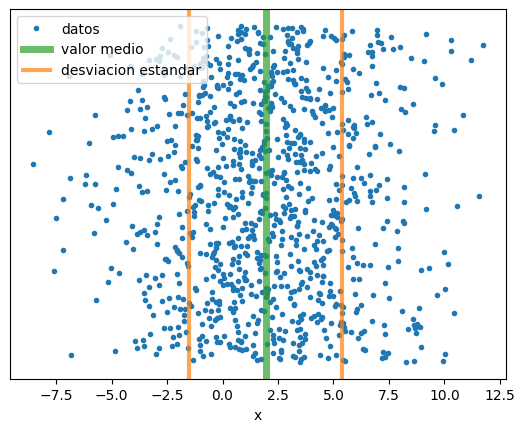

In [69]:
np.random.seed(0)

N=1000
datos_normales = np.random.randn(N)*3.5+2.1


desviacion_estandar_poblacion = np.std(datos_normales)
desviacion_estandar_muestra   = np.std(datos_normales,ddof=1)
media                         = np.mean(datos_normales)

print(f'Valor medio: {media}')

print(f'Desviación estándar (población): {desviacion_estandar_poblacion}')
print(f'Desviación estándar ( muestra ): {desviacion_estandar_muestra}')


plt.figure()
plt.plot(   datos_normales , np.arange(len(datos_normales)), '.' , label='datos')
plt.axvline(         media , linewidth=5 , alpha=0.7, color='C2',label='valor medio' )
plt.axvline( media-desviacion_estandar_poblacion , linewidth=3 , alpha=0.7, color='C1' )
plt.axvline( media+desviacion_estandar_poblacion , linewidth=3 , alpha=0.7, color='C1' , label='desviacion estandar' )
plt.yticks([])
plt.legend()
plt.xlabel('x')

print('')


## Histograma

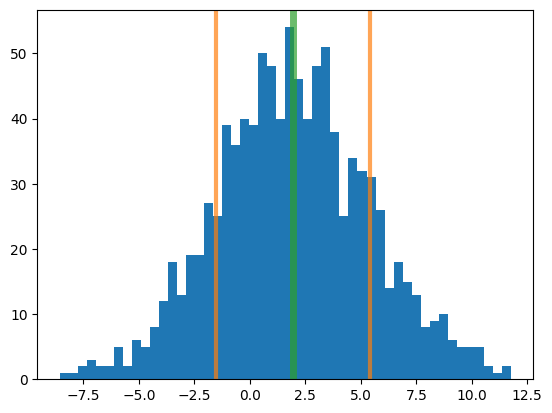

In [70]:

plt.figure()
cantidad, limites, pl0 = plt.hist(datos_normales, 50)
plt.axvline( media-desviacion_estandar_poblacion , linewidth=3 , alpha=0.7, color='C1' )
plt.axvline( media+desviacion_estandar_poblacion , linewidth=3 , alpha=0.7, color='C1' )
plt.axvline( media                               , linewidth=5 , alpha=0.7, color='C2' )

print('')

# Análisis de series de datos comparadas

Herramientas para comparar series de datos apareadas, su relación y tendencia.



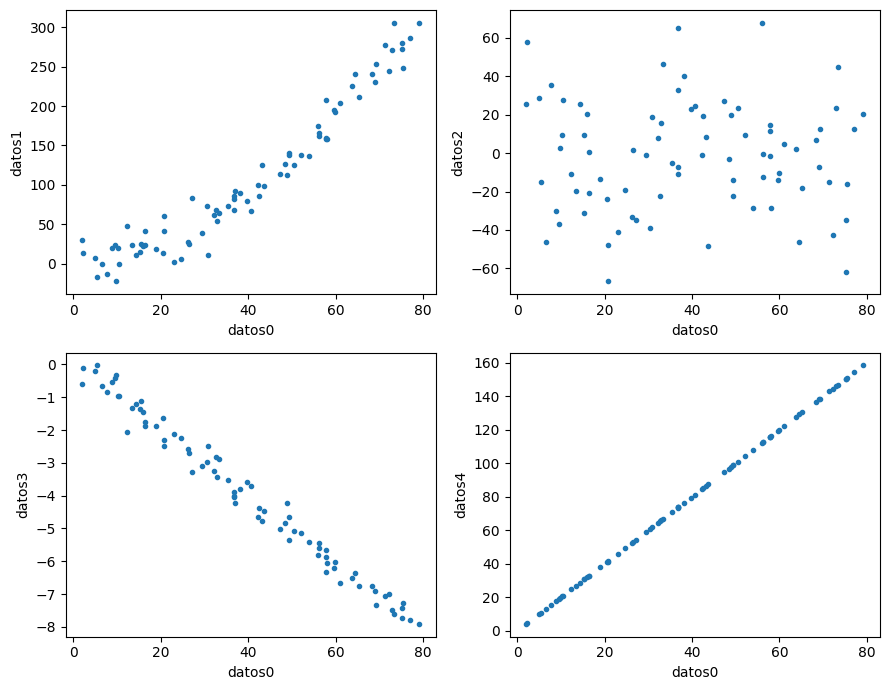

In [73]:
# Producción de datos aleatoreos
np.random.seed(0)
N = 80
datos0 = np.arange(N) + np.random.randn(N)*3
datos1 = (np.arange(N)*2)**2/N + np.random.randn(N)*15
datos2 = np.random.randn(N)*30
datos3 = -np.arange(N)/10 + np.random.randn(N)*0.05
datos4 = datos0*2

# gráficos
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
plt.plot(datos0,datos1,'.')
plt.xlabel('datos0')
plt.ylabel('datos1')

plt.subplot(2,2,2)
plt.plot(datos0,datos2,'.')
plt.xlabel('datos0')
plt.ylabel('datos2')

plt.subplot(2,2,3)
plt.plot(datos0,datos3,'.')
plt.xlabel('datos0')
plt.ylabel('datos3')

plt.subplot(2,2,4)
plt.plot(datos0,datos4,'.')
plt.xlabel('datos0')
plt.ylabel('datos4')

plt.tight_layout()
#

## Covarianza

Un estimador de la covarianza de una muestra $(x,y)$ es:

$$
\mathrm{cov}(x,y)
\longleftarrow
S_{xy}
=
\frac{1}{N-1}
\sum_{i=1}^N
(x-\bar x)\cdot(y-\bar y)
$$


In [72]:
# Calculo de covarianza
def cov_xy(x,y):
    cov_xy = np.sum( ( x-np.mean(x) )*( y-np.mean(y) )  ) / ( len(x)-1 )
    return cov_xy

dat = (datos0,datos1,datos2,datos3,datos4)

for j in range(1,len(dat)):
    print(f'Covarianza (def) entre {0} y {j}: {cov_xy(dat[0],dat[j])}')
    print(f'Covarianza Numpy entre {0} y {j}: {np.cov(dat[0],dat[j],ddof=1)[0,1]}')
    print("")


Covarianza (def) entre 0 y 1: 1985.7802115485936
Covarianza Numpy entre 0 y 1: 1985.7802115485931

Covarianza (def) entre 0 y 2: -6.265135447814603
Covarianza Numpy entre 0 y 2: -6.265135447814613

Covarianza (def) entre 0 y 3: -51.49378125145063
Covarianza Numpy entre 0 y 3: -51.493781251450635

Covarianza (def) entre 0 y 4: 1002.502922292915
Covarianza Numpy entre 0 y 4: 1002.5029222929152



## Correlación

La correlación entremuestras $(x,y)$ es:

$$
\mathrm{corr}(x,y)
\longleftarrow
\rho_{xy}
=
\frac{ \mathrm{cov}(x,y)  }{\sigma_x \sigma_y}
$$

In [77]:
# Calculo de covarianza
def corr_xy(x,y):
    cov_xy = np.sum( ( x-np.mean(x) )*( y-np.mean(y) )  ) / ( len(x)-1 )
    return cov_xy/np.std(x,ddof=1)/np.std(y,ddof=1)

dat = (datos0,datos1,datos2,datos3,datos4)

for j in range(1,len(dat)):
    print(f'Correlación (def) entre {0} y {j}: {corr_xy(dat[0],dat[j])}')
    print(f'Correlación Numpy entre {0} y {j}: {np.corrcoef(dat[0],dat[j])[0,1]}')
    print("")
#

Correlación (def) entre 0 y 1: 0.9568788979936729
Correlación Numpy entre 0 y 1: 0.9568788979936724

Correlación (def) entre 0 y 2: -0.009768951964900593
Correlación Numpy entre 0 y 2: -0.00976895196490061

Correlación (def) entre 0 y 3: -0.9915679314419099
Correlación Numpy entre 0 y 3: -0.9915679314419097

Correlación (def) entre 0 y 4: 0.9999999999999999
Correlación Numpy entre 0 y 4: 1.0

